In [1]:
# Notebook to study the gammas emmited from the 2nubb events
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic color scale
from matplotlib.cm import get_cmap

# Create a sequential colormap
cmap = get_cmap('Spectral')  # You can choose any sequential colormap here

plt.rcParams['figure.facecolor'] = 'w'

# plt.rcParams["font.size"] = 15
# plt.rcParams["figure.figsize"] = 11,9

/var/folders/jd/kvzhhkr9149gtsb7r7pjbvdc0000gp/T/ipykernel_88727/1938207047.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('Spectral')  # You can choose any sequential colormap here


## Load in the files and print info

In [2]:
# Loading in the files
files = []

mode = "esmeralda"

if (mode == "nexus"):
    files.append("../downloads/NEXT100_LPR_Tl208_PORT1a_slim.h5") # LPR Port 1A event
else:
    files.append("../downloads/NEXT100_LPR_Tl208_PORT1a_esmeralda_slim-2.h5") # LPR Port 1A event

print(files)

config_v = []
parts_v  = []
hits_v   = []
chits_v =  []
 
for index, f in enumerate(files):
    
    if (mode == "nexus"):
        config_v.append(pd.read_hdf(f, 'config'))
    else:
        chits_v.append(pd.read_hdf(f, 'lt_chits'))

    
    parts_v .append(pd.read_hdf(f, 'parts'))
    hits_v  .append(pd.read_hdf(f, 'hits'))
    
if (mode == "nexus"):
    display(config_v[0])
else:
    # Divide the event numbers for the reco by two
    chits_v[0].event = chits_v[0].event//2 # Double slash is integer division
    
    display(chits_v[0])



['../downloads/NEXT100_LPR_Tl208_PORT1a_esmeralda_slim-2.h5']


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,990000,1.980001e+12,0.0,434.069955,206.608199,1.0,443.175,209.925,0.0,0.0,164.372818,11.246377,1004.000000,-1,0.003422,-1,-1
1,990000,1.980001e+12,0.0,434.069955,206.608199,1.0,427.625,209.925,0.0,0.0,165.400772,9.159420,297.411747,-1,0.001422,-1,-1
2,990000,1.980001e+12,0.0,434.069955,206.608199,1.0,427.625,225.475,0.0,0.0,165.400772,7.072464,229.647060,-1,0.001345,-1,-1
3,990000,1.980001e+12,0.0,434.069955,206.608199,1.0,443.175,209.925,0.0,0.0,165.400772,12.347826,400.941163,-1,0.001367,-1,-1
4,990000,1.980001e+12,0.0,434.069955,206.608199,1.0,427.625,209.925,0.0,0.0,166.434723,15.942029,668.091458,-1,0.003195,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,80338,1.606765e+11,1.0,227.391575,239.144270,1.0,225.475,256.575,0.0,0.0,734.436340,6.144928,276.756342,-1,0.000939,-1,-1
1229,80338,1.606765e+11,1.0,227.391575,239.144270,1.0,241.025,256.575,0.0,0.0,734.436340,7.130435,321.141804,-1,0.001099,-1,-1
1230,80338,1.606765e+11,1.0,227.391575,239.144270,1.0,225.475,225.475,0.0,0.0,735.472168,6.086957,972.204556,-1,0.003269,-1,-1
1231,80338,1.606765e+11,1.0,227.391575,239.144270,1.0,241.025,241.025,0.0,0.0,735.472168,6.666667,1064.795444,-1,0.003645,-1,-1


In [3]:
## Particles
#pd.set_option('display.max_rows', 20)  # Change 1000 to your desired maximum number
display(parts_v[0][parts_v[0].event_id == 990000])
display(chits_v[0][chits_v[0].event == 990000])

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,990000,1,Tl208,True,0,398.875244,394.635712,532.951294,0.000000,398.875244,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,none,RadioactiveDecay
1,990000,4,e-,False,1,398.875244,394.635712,532.951294,0.000465,399.641754,...,0.496680,0.184480,-0.907411,0.000000,0.00000,0.000000,0.657435,1.859799e+00,RadioactiveDecay,eIoni
2,990000,5,e-,False,4,399.025238,394.691437,532.677246,0.001642,399.041443,...,-0.020379,-0.023106,-0.019091,0.000000,0.00000,-0.000000,0.001284,1.037215e-01,eIoni,eIoni
3,990000,3,anti_nu_e,False,1,398.875244,394.635712,532.951294,0.000465,-3993.610352,...,-0.275837,-0.809750,0.137137,-0.275837,-0.80975,0.137137,0.866364,1.379618e+04,RadioactiveDecay,Transportation
4,990000,2,Pb208[3475.078],False,1,398.875244,394.635712,532.951294,0.000465,398.875244,...,-0.220843,0.625269,0.770273,-0.000000,0.00000,0.000000,0.000003,0.000000e+00,RadioactiveDecay,RadioactiveDecay
5,990000,7,gamma,False,2,398.875244,394.635712,532.951294,0.000465,435.379852,...,-0.126641,-0.199755,-0.827414,0.000000,-0.00000,-0.000000,0.860554,4.779100e+02,RadioactiveDecay,phot
6,990000,23,e-,False,7,435.379852,214.032700,166.554489,1.594601,435.379852,...,-0.002019,-0.001280,-0.006304,-0.000000,-0.00000,-0.000000,0.000044,2.169007e-06,phot,msc
7,990000,22,e-,False,7,435.379852,214.032700,166.554489,1.594601,435.379883,...,0.000928,-0.003006,0.006137,-0.000000,-0.00000,-0.000000,0.000047,1.719049e-04,phot,msc
8,990000,21,e-,False,7,435.379852,214.032700,166.554489,1.594601,435.379944,...,0.004420,0.000072,-0.001212,-0.000000,-0.00000,-0.000000,0.000021,8.319688e-05,phot,msc
9,990000,20,e-,False,7,435.379852,214.032700,166.554489,1.594601,435.379852,...,-0.003925,0.001328,-0.002439,-0.000000,0.00000,0.000000,0.000023,2.033153e-05,phot,msc


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,990000,1.980001e+12,0.0,434.069955,206.608199,1.0,443.175,209.925,0.0,0.0,164.372818,11.246377,1004.000000,-1,0.003422,-1,-1
1,990000,1.980001e+12,0.0,434.069955,206.608199,1.0,427.625,209.925,0.0,0.0,165.400772,9.159420,297.411747,-1,0.001422,-1,-1
2,990000,1.980001e+12,0.0,434.069955,206.608199,1.0,427.625,225.475,0.0,0.0,165.400772,7.072464,229.647060,-1,0.001345,-1,-1
3,990000,1.980001e+12,0.0,434.069955,206.608199,1.0,443.175,209.925,0.0,0.0,165.400772,12.347826,400.941163,-1,0.001367,-1,-1
4,990000,1.980001e+12,0.0,434.069955,206.608199,1.0,427.625,209.925,0.0,0.0,166.434723,15.942029,668.091458,-1,0.003195,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,990000,1.980001e+12,1.0,355.067975,244.194976,1.0,365.425,256.575,0.0,0.0,319.658813,9.739130,461.122365,-1,0.001685,-1,-1
194,990000,1.980001e+12,1.0,355.067975,244.194976,1.0,349.875,241.025,0.0,0.0,320.699036,6.028986,317.165571,-1,0.001107,-1,-1
195,990000,1.980001e+12,1.0,355.067975,244.194976,1.0,349.875,256.575,0.0,0.0,320.699036,6.144928,323.264907,-1,0.001128,-1,-1
196,990000,1.980001e+12,1.0,355.067975,244.194976,1.0,365.425,241.025,0.0,0.0,320.699036,5.333333,280.569552,-1,0.001025,-1,-1


#### Apply containment and sum the hits in the active volume energy

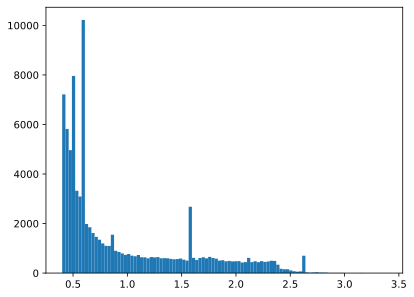

In [4]:
# Get the hit tables and plot the total energy deposited in the TPC
uncontained_hit_events = hits_v[0][hits_v[0].label != "ACTIVE"].event_id.unique()

hits_contained_df = hits_v[0][~hits_v[0].event_id.isin(uncontained_hit_events) ]

# Sum the energy of the hits and bin into a histogram
hit_tot_energy = hits_contained_df.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')

# Also merge this event energy into the main dataframe
# Merge the original DataFrame with the summed energy DataFrame based on 'event'
hits_contained_df = pd.merge(hits_contained_df, hit_tot_energy, on='event_id')
plt.figure()
plt.hist(hit_tot_energy.hit_tot_energy, bins = 100);



Double escape events

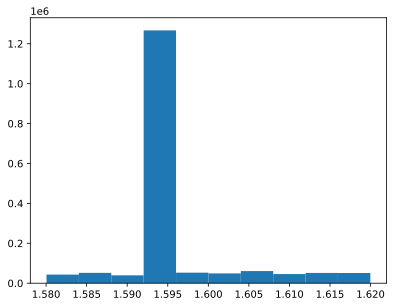

In [5]:
# Get the DE peak events
DE_hits = hits_contained_df[(hits_contained_df.hit_tot_energy > 1.58) & (hits_contained_df.hit_tot_energy < 1.62)  ]
DE_event_ids = DE_hits.event_id

plt.figure()
plt.hist(hits_contained_df[hits_contained_df.event_id.isin(DE_event_ids)].hit_tot_energy);

### Get all the gammas in the event and the bremsstrahlung 
- Also applies conainment requirement of the gammas 
- Applies 2 cm cut to the bremstrahlung (this accounts for voxelation, but not necissarily the diffusion yet)

In [6]:
# Plot the distance of the gammas and bin in a histogram
gammas = parts_v[0][parts_v[0]["particle_name"] == "gamma" ]

# Get all gammas that originate in the DE peak
gammas = gammas[gammas.event_id.isin(DE_event_ids) ]

# Create a table of bremstrahlung gammas
eBrem =  gammas[  (gammas["creator_proc"] == "eBrem")  ]

# Remove the events where there is a bremstahlung gamma that escapes the active
uncontained_brem_events = eBrem[ (eBrem.final_volume != "ACTIVE")].event_id.unique()

eBrem_contained = eBrem[~eBrem.event_id.isin(uncontained_brem_events) ]

# Apply a distance cut, so make sure the event has 1 bremstrahlung that travelled more than 2 cm
eBrem_contained_long_dist_evtid = eBrem[ (eBrem.length > 20)].event_id
eBrem_contained = eBrem_contained[eBrem_contained.event_id.isin(eBrem_contained_long_dist_evtid) ]

#display(eBrem_contained)
print(eBrem_contained.event_id.unique())

# Also get the other contained gammas in the event that are not direct bremsstrahlung
# Remove the events where there is a bremstahlung gamma that escapes the active
gammas_contained = gammas[ (gammas.final_volume == "ACTIVE")]
gammas_contained = gammas_contained[gammas_contained.creator_proc != "eBrem"]
gammas_contained = gammas_contained[gammas_contained.kin_energy < 0.5] # remove the annihilation gammas and the incident
# gammas_contained = gammas_contained[ (gammas_contained.length > 20)]


# Remove rows that are bremsstrahlung
# gammas_contained = gammas_contained[gammas_contained.final_proc != "eBrem"]


[ 990022  990295  990296 1010070 1010234 1010320 1020102 1030140 1040017
 1050286 1060187 1060310 1060344 1070085 1090048 1090097 1110143 1120220
 1120299 1130054 1130159 1130268 1140007 1140064 1140201 1140227 1150032
 1150045 1150154 1150263 1160104 1160144 1160175 1160217 1170170 1180064
 1180286 1190145 1190148 1190294 1200090 1210191 1220007 1220074 1220281
 1230340 1230352 1250127 1250129 1250284 1260164 1270306 1280126 1280144
 1280201 1280249 1290261 1290266 1300084 1300119 1310143 1310305 1320001
 1320008 1320182 1320290 1320315 1330320 1340167 1380039 1380156 1380167
 1390090 1390124 1400071 1410075 1410198 1420234 1420254 1420286 1420331
 1430044 1440095 1450273 1460059 1460113 1460341 1470124 1470215 1470230
 1470232 1480097 1480113 1480228  130005  130089  130193 1490029 1490184
 1490209 1510089 1510185 1520060 1520200 1530135 1530203 1530299 1540125
 1540200 1550258 1560131 1560286 1560290 1580059 1580154  140306 1590020
 1600020 1600214 1600311 1610014 1610246 1620279 16

#### Plot the MC true event
- Label bremstrahlung as green
- Label other gammas as red

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
433,130005,45,gamma,False,18,187.363831,-170.184494,327.842072,3.488720,187.349152,...,-0.000098,0.000984,0.000870,-0.0,0.0,0.0,0.001317,0.196554,eBrem,phot
440,130005,44,gamma,False,18,188.526810,-170.529465,325.559601,3.471690,188.536942,...,0.000106,-0.001331,0.000847,0.0,-0.0,0.0,0.001581,0.151037,eBrem,phot
445,130005,43,gamma,False,18,176.229904,-184.146759,320.971893,3.319904,176.232193,...,0.000695,0.001823,0.000684,0.0,0.0,0.0,0.002067,0.006805,eBrem,phot
457,130005,39,gamma,False,18,158.024841,-201.472427,336.528137,2.658109,160.834427,...,0.001768,-0.000657,-0.004255,0.0,-0.0,-0.0,0.004655,7.397979,eBrem,phot
467,130005,38,gamma,False,18,156.300888,-199.100677,418.863678,2.327594,82.544243,...,-0.113888,0.087156,-0.073937,-0.0,0.0,-0.0,0.161348,104.492958,eBrem,phot
489,130005,37,gamma,False,18,166.982040,-205.066666,421.858429,2.282976,166.824356,...,-0.004584,0.000028,-0.002676,-0.0,0.0,-0.0,0.005307,0.182590,eBrem,phot


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
19149,1620279,1,Tl208,True,0,395.672028,394.171997,532.137634,0.000000,395.672028,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,none,RadioactiveDecay
19150,1620279,4,e-,False,1,395.672028,394.171997,532.137634,0.000048,396.463165,...,0.388199,-0.052255,-1.004995,-0.000000,0.000000,-0.000000,0.682552,2.313692,RadioactiveDecay,eIoni
19151,1620279,3,anti_nu_e,False,1,395.672028,394.171997,532.137634,0.000048,-6345.287598,...,-0.377982,0.678804,-0.322563,-0.377982,0.678804,-0.322563,0.841244,15002.802734,RadioactiveDecay,Transportation
19152,1620279,2,Pb208[3475.078],False,1,395.672028,394.171997,532.137634,0.000048,395.672028,...,-0.010217,-0.626550,1.327560,-0.000000,-0.000000,0.000000,0.000006,0.000000,RadioactiveDecay,RadioactiveDecay
19153,1620279,6,gamma,False,2,395.672028,394.171997,532.137634,0.000048,434.889709,...,0.661658,-0.066013,-0.546264,-0.000000,0.000000,0.000000,0.860554,126.342003,RadioactiveDecay,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19252,1620279,32,e-,False,29,217.875076,43.752434,911.295410,2.193421,217.336990,...,-0.134452,-0.134969,0.104127,-0.000000,-0.000000,0.000000,0.044209,2.638689,eIoni,eIoni
19253,1620279,31,e-,False,29,229.899048,30.298182,907.136536,2.126438,229.832291,...,-0.066102,0.032833,-0.124166,-0.000000,0.000000,0.000000,0.020023,0.580499,eIoni,eIoni
19254,1620279,28,e-,False,27,229.798325,-6.050524,842.244690,1.777223,240.604187,...,0.573542,0.074649,0.184576,-0.000000,-0.000000,-0.000000,0.282545,49.153637,conv,eIoni
19255,1620279,108,e-,False,28,234.704300,-3.082546,841.268250,1.804864,234.740112,...,0.006576,0.127752,-0.063400,-0.000000,-0.000000,-0.000000,0.019570,0.595816,eIoni,eIoni


[990000 990001 990002 ...  80335  80337  80338]


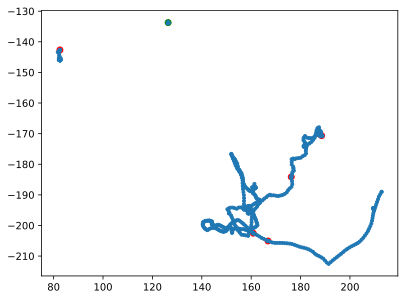

In [7]:
# Plot an event with brem
event = DE_hits[DE_hits.event_id == 130005]
event_brem = eBrem_contained[eBrem_contained.event_id == 130005 ]
event_gamma = gammas_contained[gammas_contained.event_id == 130005 ]

display(event_brem)
#display(event_gamma)
# pd.set_option('display.max_rows', 115)  # Change 1000 to your desired maximum number
display(parts_v[0][ (parts_v[0].event_id == 1620279)  ])
print(parts_v[0].event_id.unique())
# display(event)
plt.figure()
plt.plot(event.x, event.y, ".")
plt.scatter(event_gamma.final_x,event_gamma.final_y, color = "g")
plt.scatter(event_brem.final_x,event_brem.final_y, color = "r")


#### Plot the energy of the visible bremsstrahlung vs the other gammas in the event

Text(0.5, 0, 'Gamma Energy [MeV]')

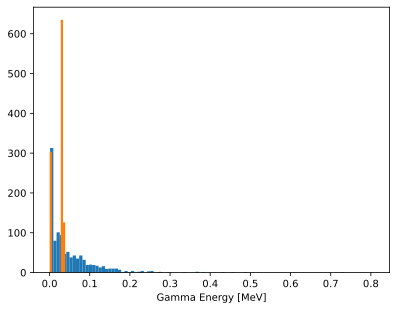

In [8]:
# Plot the energy of the visible brem vs all gammas in the event that are contained
# We must include a distance cut too
plt.figure()
plt.hist(eBrem_contained.kin_energy, bins = 100);
plt.hist(gammas_contained[gammas_contained.kin_energy < 0.5].kin_energy, bins = 50);
plt.xlabel("Gamma Energy [MeV]")
# plt.xlim(0, 0.01)

#### Lets now look at the reconstructed stuff

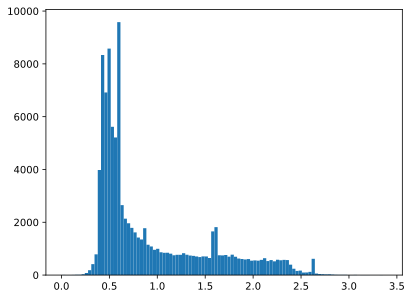

In [9]:
# Now lets plot the energy distribution of the esmeralda hits

# Sum the energy of the hits and bin into a histogram
chit_tot_energy = chits_v[0].groupby('event')['Ec'].sum().reset_index(name='hit_tot_energy')

plt.figure()
plt.hist(chit_tot_energy.hit_tot_energy, bins = 100);

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,990022,1.980046e+12,0.0,379.796942,232.021758,1.0,412.075,225.475,0.0,0.0,359.662628,5.449275,1109.000000,-1,0.004751,-1,-1
1,990022,1.980046e+12,0.0,379.796942,232.021758,1.0,396.525,225.475,0.0,0.0,360.710083,6.898551,956.999939,-1,0.003578,-1,-1
2,990022,1.980046e+12,0.0,379.796942,232.021758,1.0,396.525,225.475,0.0,0.0,361.747864,13.101449,573.150791,-1,0.002143,-1,-1
3,990022,1.980046e+12,0.0,379.796942,232.021758,1.0,396.525,241.025,0.0,0.0,361.747864,6.782609,296.719655,-1,0.001176,-1,-1
4,990022,1.980046e+12,0.0,379.796942,232.021758,1.0,412.075,225.475,0.0,0.0,361.747864,7.478261,327.152455,-1,0.001402,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,80301,1.606031e+11,1.0,-85.176090,-318.155067,1.0,-38.875,-318.775,0.0,0.0,298.681152,10.608696,765.526753,-1,0.002425,-1,-1
879,80301,1.606031e+11,1.0,-85.176090,-318.155067,1.0,-23.325,-318.775,0.0,0.0,298.681152,10.028986,723.694701,-1,0.002292,-1,-1
880,80301,1.606031e+11,1.0,-85.176090,-318.155067,1.0,-38.875,-318.775,0.0,0.0,299.701630,8.115942,652.696223,-1,0.002068,-1,-1
881,80301,1.606031e+11,1.0,-85.176090,-318.155067,1.0,-23.325,-318.775,0.0,0.0,299.701630,8.869565,713.303716,-1,0.002260,-1,-1


465984


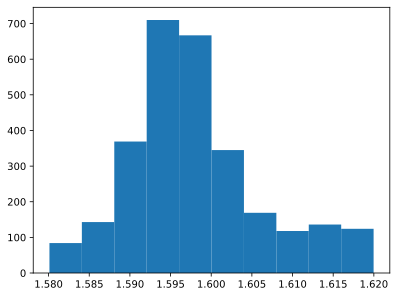

In [10]:
# Get the reco events in the DE peak
reco_DE_event_ids      = chit_tot_energy[(chit_tot_energy.hit_tot_energy > 1.58) & (chit_tot_energy.hit_tot_energy < 1.62)  ].event

reco_DE_events = chits_v[0][chits_v[0].event.isin(reco_DE_event_ids)]

# Also apply cut so that we look at events in the MC sample
reco_DE_events = chits_v[0][chits_v[0].event.isin(eBrem_contained.event_id.unique())] 

display(reco_DE_events)
# print(reco_DE_events.event.unique())

plt.figure()
plt.hist(chit_tot_energy[chit_tot_energy.event.isin(reco_DE_event_ids)].hit_tot_energy);
print(len(reco_DE_events))


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,80301,1.606031e+11,0.0,-168.707227,-437.226611,1.0,-178.825,-443.175,0.0,0.0,45.757828,6.724638,505.924583,-1,0.002303,-1,-1
1,80301,1.606031e+11,0.0,-168.707227,-437.226611,1.0,-163.275,-443.175,0.0,0.0,45.757828,11.072464,833.031032,-1,0.003792,-1,-1
2,80301,1.606031e+11,0.0,-168.707227,-437.226611,1.0,-163.275,-427.625,0.0,0.0,45.757828,8.347826,628.044319,-1,0.002323,-1,-1
3,80301,1.606031e+11,0.0,-168.707227,-437.226611,1.0,-178.825,-443.175,0.0,0.0,46.734482,11.652174,504.969727,-1,0.002299,-1,-1
4,80301,1.606031e+11,0.0,-168.707227,-437.226611,1.0,-178.825,-427.625,0.0,0.0,46.734482,5.913043,256.253293,-1,0.000948,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,80301,1.606031e+11,1.0,-85.176090,-318.155067,1.0,-38.875,-318.775,0.0,0.0,298.681152,10.608696,765.526753,-1,0.002425,-1,-1
879,80301,1.606031e+11,1.0,-85.176090,-318.155067,1.0,-23.325,-318.775,0.0,0.0,298.681152,10.028986,723.694701,-1,0.002292,-1,-1
880,80301,1.606031e+11,1.0,-85.176090,-318.155067,1.0,-38.875,-318.775,0.0,0.0,299.701630,8.115942,652.696223,-1,0.002068,-1,-1
881,80301,1.606031e+11,1.0,-85.176090,-318.155067,1.0,-23.325,-318.775,0.0,0.0,299.701630,8.869565,713.303716,-1,0.002260,-1,-1


626
883


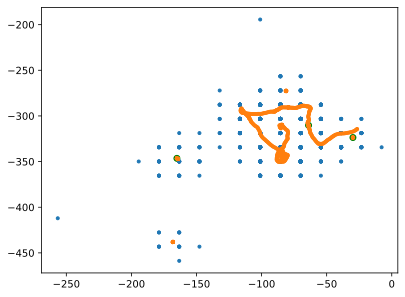

In [11]:
# Plot a reco event
ev_id = 80301

reco_event = chits_v[0][chits_v[0].event == ev_id]
display(reco_event)
event = DE_hits[DE_hits.event_id == ev_id]
event_brem = eBrem_contained[eBrem_contained.event_id == ev_id ]
event_gamma = gammas_contained[gammas_contained.event_id == ev_id ]

plt.figure()
plt.plot(reco_event.X, reco_event.Y, ".")
plt.plot(event.x, event.y, ".")
#plt.scatter(event_gamma.final_x,event_gamma.final_y, color = "g")
plt.scatter(event_brem.final_x,event_brem.final_y, color = "g")
print(len(event))
print(len(reco_event))

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
1305,640015,65,gamma,False,25,-155.548294,-427.712067,639.471619,3.780680,-147.857422,...,0.067188,-0.019834,-0.116802,0.0,-0.0,-0.0,0.136200,15.590387,eBrem,phot
1324,640015,63,gamma,False,25,-167.551468,-385.881409,600.551819,3.282159,-152.501556,...,0.023682,-0.054304,0.034278,0.0,-0.0,0.0,0.068445,43.497410,eBrem,phot


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,640015,1.280031e+12,0.0,-130.04154,-374.513931,1.0,-132.175,-349.875,0.0,0.0,576.995361,6.724638,1520.000000,-1,0.005170,-1,-1
1,640015,1.280031e+12,0.0,-130.04154,-374.513931,1.0,-132.175,-349.875,0.0,0.0,578.025330,5.333333,1147.000000,-1,0.003901,-1,-1
2,640015,1.280031e+12,0.0,-130.04154,-374.513931,1.0,-147.725,-349.875,0.0,0.0,579.089722,8.985507,939.253729,-1,0.003199,-1,-1
3,640015,1.280031e+12,0.0,-130.04154,-374.513931,1.0,-132.175,-365.425,0.0,0.0,579.089722,6.550725,684.746271,-1,0.002384,-1,-1
4,640015,1.280031e+12,0.0,-130.04154,-374.513931,1.0,-147.725,-365.425,0.0,0.0,580.128845,6.840580,403.743288,-1,0.001402,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,640015,1.280031e+12,0.0,-130.04154,-374.513931,1.0,-147.725,-396.525,0.0,0.0,647.288940,5.043478,285.150008,-1,0.001015,-1,-1
952,640015,1.280031e+12,0.0,-130.04154,-374.513931,1.0,-178.825,-427.625,0.0,0.0,648.309631,5.043478,539.526695,-1,0.002213,-1,-1
953,640015,1.280031e+12,0.0,-130.04154,-374.513931,1.0,-163.275,-443.175,0.0,0.0,648.309631,5.275362,564.332513,-1,0.003090,-1,-1
954,640015,1.280031e+12,0.0,-130.04154,-374.513931,1.0,-163.275,-427.625,0.0,0.0,648.309631,5.275362,564.332513,-1,0.002315,-1,-1


[[-147.85742 -152.50156]
 [-429.98245 -420.3921 ]
 [ 626.1017   622.3357 ]]
Selected reco_points (columns where any 3D distance is less than 5):
[[-147.725      -147.725      -147.725      -147.725      -147.725
  -147.725      -147.725      -147.725      -147.725     ]
 [-427.625      -427.625      -427.625      -427.625      -427.625
  -427.625      -427.625      -427.625      -427.625     ]
 [ 622.10760498  623.15783691  624.2008667   625.25848389  626.30041504
   627.34381104  628.39318848  629.43652344  630.49560547]]


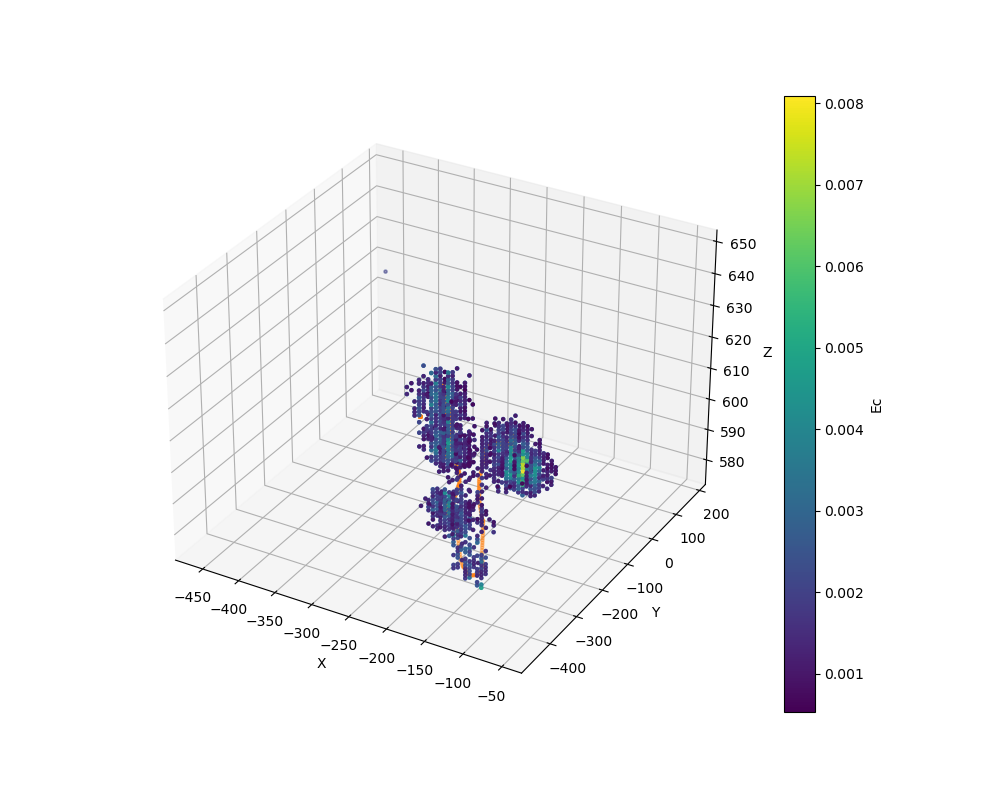

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget
 
ev_id = 640015
event = DE_hits[DE_hits.event_id == ev_id]
event_brem = eBrem_contained[eBrem_contained.event_id == ev_id]
reco_event = chits_v[0][chits_v[0].event == ev_id]
display(event_brem)
display(reco_event)

fig = plt.figure(figsize=(10, 8)) 
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reco_event.X, reco_event.Y, reco_event.Z, marker=".")
ax.scatter(event.x, event.y, event.z, marker=".")
ax.scatter(event_brem.final_x, event_brem.final_y, event_brem.final_z, color="r", marker="*")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
#ax.set_title("3D Scatter Plot")

ax.plot

Energy = reco_event.Ec
#print(Energy)

reco_point = np.array([reco_event.X, reco_event.Y, reco_event.Z])
#print(reco_point)

event_brem_point = np.array([event_brem.final_x, event_brem.final_y, event_brem.final_z])
print(event_brem_point)

single_brem_point = event_brem_point[:, 0] 
num_points = reco_point.shape[1] 
replicated_brem_point = np.tile(single_brem_point.reshape(3, 1), (1, num_points))

distances = np.zeros((event_brem_point.shape[1], reco_point.shape[1]))  # Shape (3, 883)

for i in range(event_brem_point.shape[1]):  
    single_brem_point = event_brem_point[:, i]  
    replicated_brem_point = np.tile(single_brem_point.reshape(3, 1), (1, reco_point.shape[1]))
    distances[i] = np.linalg.norm(reco_point - replicated_brem_point, axis=0)


#for i in range(distances.shape[0]):
    #print(f"Distances to event_brem_point {i + 1}:")
    #print(distances[i])
    #print()

indices = np.any(distances < 5, axis=0)

selected_reco_points = reco_point[:, indices]

print("Selected reco_points (columns where any 3D distance is less than 5):")
print(selected_reco_points)

selected_energies = []
tolerance = 1e-5  

for point in selected_reco_points.T: 
    for index, row in reco_event.iterrows():
        if (np.abs(row['X'] - point[0]) < tolerance) and \
           (np.abs(row['Y'] - point[1]) < tolerance) and \
           (np.abs(row['Z'] - point[2]) < tolerance):
            # Append the energy value to the list
            selected_energies.append(row['Ec'])
            break 
selected_energies
plt.savefig(r'C:\Users\exd4668\Desktop\my_figure.png')

scatter = ax.scatter(reco_event.X, reco_event.Y, reco_event.Z, c=reco_event.Ec, marker=".")

# If you have other scatter plots, you can add them here

# Creating a colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Ec')
plt.show()
#plt.close('all')

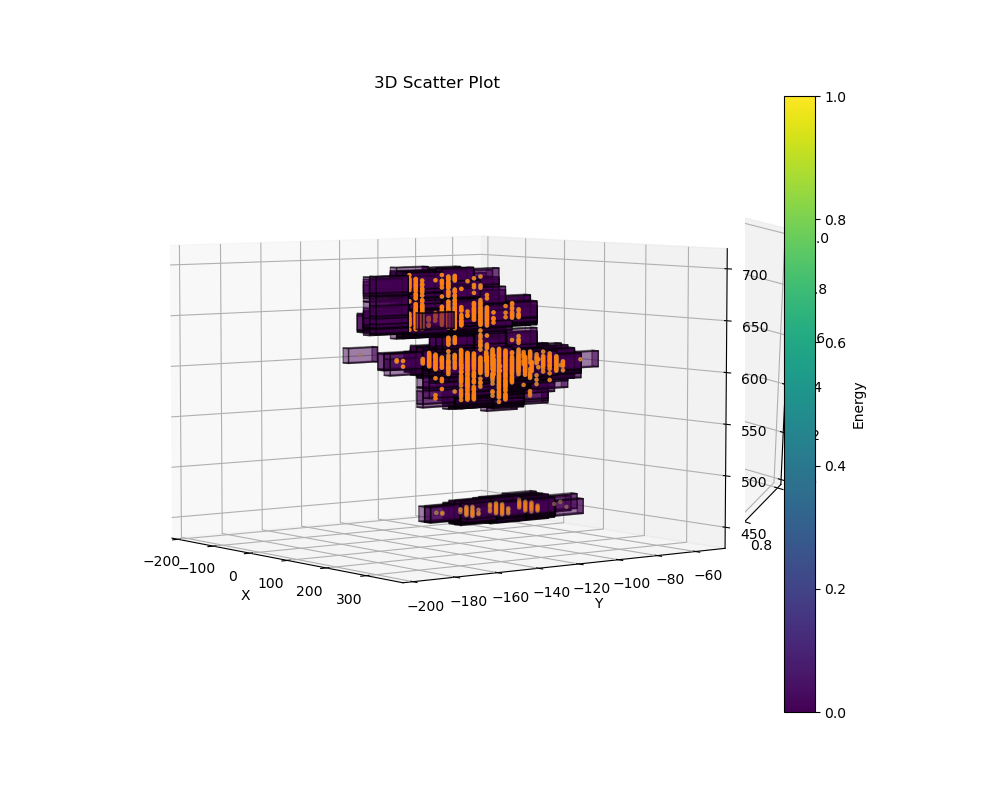

Number of Voxels: 942


In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection  # Import Poly3DCollection
import numpy as np

ev_id = 99
reco_event = chits_v[0][chits_v[0].event == ev_id]

# Create a 3D figure

fig = plt.figure(figsize=(10, 8)) 
ax = fig.add_subplot(111, projection='3d')

ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(reco_event.X, reco_event.Y, reco_event.Z, marker=".")
# Scatter plot your data points in 3D
ax.scatter(reco_event.X, reco_event.Y, reco_event.Z, marker=".")

# Set labels and title if needed
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Scatter Plot")

# Define voxel size (15mm in each dimension)
voxel_size = 15

# Reference point for color calculation (you can choose any point)
reference_point = [1, 0, 0]

# Loop through your scatter plot points and plot solid cubes (voxels) around each point
for x, y, z in zip(reco_event.X, reco_event.Y, reco_event.Z):
    voxel_x = [x - voxel_size/2, x + voxel_size/2]
    voxel_y = [y - voxel_size/2, y + voxel_size/2]
    voxel_z = [z - voxel_size/2, z + voxel_size/2]
    
    Energy = reco_event.Ec


    # Define a colormap based on distance (adjust the colors as needed)
    color = plt.cm.viridis(reco_event.Ec)  # Here, using the viridis colormap

    # Create a cube (voxel) using a polygon collection
    cube_definition = [
        [voxel_x[0], voxel_y[0], voxel_z[0]],
        [voxel_x[1], voxel_y[0], voxel_z[0]],
        [voxel_x[1], voxel_y[1], voxel_z[0]],
        [voxel_x[0], voxel_y[1], voxel_z[0]],
        [voxel_x[0], voxel_y[0], voxel_z[1]],
        [voxel_x[1], voxel_y[0], voxel_z[1]],
        [voxel_x[1], voxel_y[1], voxel_z[1]],
        [voxel_x[0], voxel_y[1], voxel_z[1]]
    ]

    r = [[cube_definition[0], cube_definition[1], cube_definition[2], cube_definition[3]],
         [cube_definition[4], cube_definition[5], cube_definition[6], cube_definition[7]],
         [cube_definition[0], cube_definition[1], cube_definition[5], cube_definition[4]],
         [cube_definition[2], cube_definition[3], cube_definition[7], cube_definition[6]],
         [cube_definition[1], cube_definition[2], cube_definition[6], cube_definition[5]]]
    

    # Create the polygon collection for the cube
    pc = Poly3DCollection(r, alpha=0.5, edgecolor='k', facecolors=color)

    # Add the cube (voxel) to the plot
    ax.add_collection3d(pc)
    
ax.view_init(elev=5, azim=-37)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Energy')

plt.show()
#plt.close('all')

# Assuming you have already loaded the reco_event dataset and created voxels as in your code
number_of_voxels = len(reco_event)

print("Number of Voxels:", number_of_voxels)
#print(Energy )

In [64]:
class Voxel:
    def __init__(self, x, y, z, energy):
        self.x = x
        self.y = y
        self.z = z
        self.energy = energy

    def is_close_to(self, other, threshold):
        distance = np.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2 + (self.z - other.z) ** 2)
        return distance < threshold


In [65]:
voxels = []
for x, y, z, energy in zip(reco_event.X, reco_event.Y, reco_event.Z, reco_event.Ec):
    voxels.append(Voxel(x, y, z, energy))


In [66]:
def group_voxels(voxels, threshold):
    groups = []
    for i, voxel in enumerate(voxels):
        added = False
        #print(f"Processing voxel {i} at position ({voxel.x}, {voxel.y}, {voxel.z})")

        for j, group in enumerate(groups):
            # Check if the voxel is close to any voxel in the current group
            if any(voxel.is_close_to(other, threshold) for other in group):
                #print(f"  Adding to existing group {j}")
                group.append(voxel)
                added = True
                break

        if not added:
            print(f"  Creating new group for voxel {i}")
            groups.append([voxel])

    print(f"Total number of groups formed: {len(groups)}")
    return groups

# Use a specific threshold for grouping
threshold = 30  # or any other value that makes sense in your context
voxel_groups = group_voxels(voxels, threshold)

  Creating new group for voxel 0
  Creating new group for voxel 96
  Creating new group for voxel 215
Total number of groups formed: 3


In [67]:
def calculate_centroid(group):
    sum_x = sum(voxel.x for voxel in group)
    sum_y = sum(voxel.y for voxel in group)
    sum_z = sum(voxel.z for voxel in group)
    count = len(group)
    return sum_x / count, sum_y / count, sum_z / count 

group_centroids = [calculate_centroid(group) for group in voxel_groups]
print(group_centroids)

group_sizes = [len(group) for group in voxel_groups]

# If you want to print the size of each group
for i, size in enumerate(group_sizes):
    print(f"Group {i} has {size} voxels")

[(30.614062499999992, -84.06718749999997, 453.0384982426961), (280.33245562130065, -149.06837278106477, 633.4115552191198), (-178.825, -116.625, 603.2138671875)]
Group 0 has 96 voxels
Group 1 has 845 voxels
Group 2 has 1 voxels


In [68]:
def calculate_total_energy(group):
    total_energy = sum(voxel.energy for voxel in group)
    return total_energy

group_energies = [calculate_total_energy(group) for group in voxel_groups]

# If you want to print the total energy of each group
for i, energy in enumerate(group_energies):
    print(f"Group {i} has a total energy of {energy}")


Group 0 has a total energy of 0.16481833199031123
Group 1 has a total energy of 1.4264545330218206
Group 2 has a total energy of 0.0007946805164985865
